C:\Users\ST1154~1\AppData\Local\Temp/ipykernel_13888/2417944263.py:25: RuntimeWarning: invalid value encountered in true_divide
  nir_ndvi = (b4 - b3)/(b4 + b3)
C:\Users\ST1154~1\AppData\Local\Temp/ipykernel_13888/2417944263.py:38: RuntimeWarning: invalid value encountered in true_divide
  mspec_ndvi = (c4 - c3)/(c4 + c3)


Multispectral bands : 5
(2135, 2362)


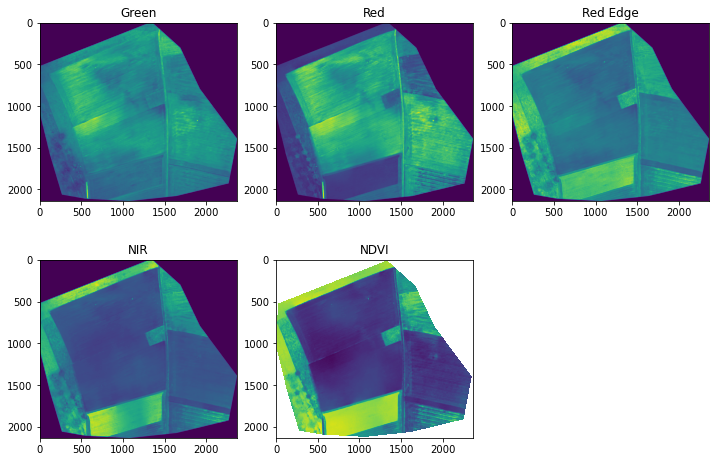

NIR bands : 4
(5675, 6279)


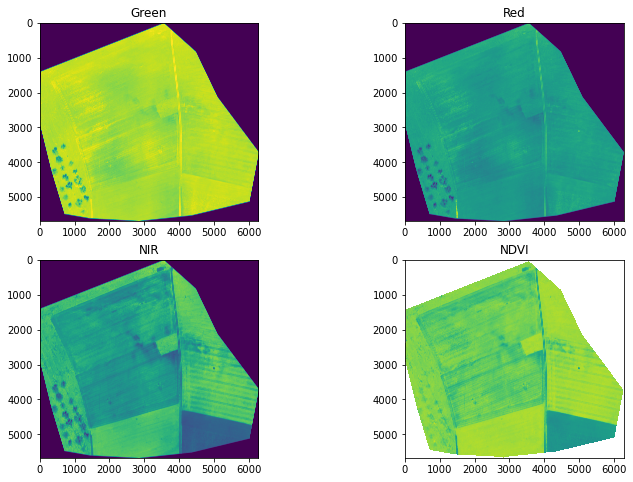

rgb bands : 4
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)]
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 

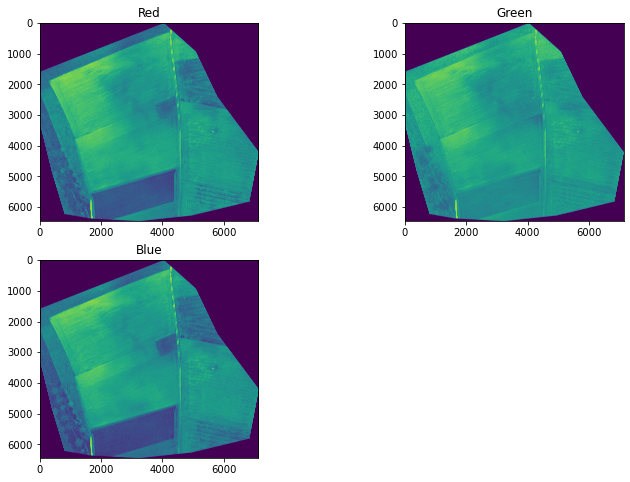

'D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_rgb.tif'

In [4]:
%reset
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio 
from rasterio.plot import plotting_extent, show
from rasterio.merge import merge
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import spectral as spy
from osgeo import gdal
import numpy as np
from skimage import io
import sys

ortho_NIR = "D:/cbr/VP2/VP2_SoilMapping/Processed/Wetzwil_Ortho/nir_2.tif"
ortho_rgb = "D:/cbr/VP2/VP2_SoilMapping/Processed/Wetzwil_Ortho/rgb_2.tif"
ortho_mspec = "D:/cbr/VP2/VP2_SoilMapping/Processed/Wetzwil_Ortho/mspec_2.tif"

g = gdal.Open(ortho_NIR)
b3 = g.GetRasterBand(2).ReadAsArray().astype(np.float32)
b4 = g.GetRasterBand(3).ReadAsArray().astype(np.float32)
nir_ndvi = (b4 - b3)/(b4 + b3)

drv = gdal.GetDriverByName ( "GTiff" )
dst_ds = drv.Create ( "D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_nir_2.tif", g.RasterXSize, g.RasterYSize, 1, 
       gdal.GDT_Float32, options=["COMPRESS=LZW"] )
dst_ds.SetGeoTransform(g.GetGeoTransform())
dst_ds.SetProjection(g.GetProjectionRef())
dst_ds.GetRasterBand(1).WriteArray(nir_ndvi)
dst_ds = None

c = gdal.Open(ortho_mspec)
c3 = c.GetRasterBand(2).ReadAsArray().astype(np.float32)
c4 = c.GetRasterBand(4).ReadAsArray().astype(np.float32)
mspec_ndvi = (c4 - c3)/(c4 + c3)


drv = gdal.GetDriverByName ( "GTiff" )
dst_ds = drv.Create ( "D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_mspec_2.tif", c.RasterXSize, c.RasterYSize, 1, 
       gdal.GDT_Float32, options=["COMPRESS=LZW"] )
dst_ds.SetGeoTransform(c.GetGeoTransform())
dst_ds.SetProjection(c.GetProjectionRef())
dst_ds.GetRasterBand(1).WriteArray(mspec_ndvi)
dst_ds = None

def CreateGeoTiff(Name, Array, driver, GeoT, Projection, DataType):
    DataSet = driver.Create(Name, Array.shape[2], Array.shape[1], Array.shape[0], DataType)
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection(Projection)
    for i, image in enumerate(Array, 1):
        DataSet.GetRasterBand(i).WriteArray(image)
    DataSet.FlushCache()
    return Name

dataset = rasterio.open(ortho_mspec)
x = gdal.Open(ortho_mspec)
print('Multispectral bands :', dataset.count)
mspec_green = dataset.read(1)
print(mspec_green.shape)
mspec_red = dataset.read(2)
mspec_rededge = dataset.read(3)
mspec_nir = dataset.read(4)
mspec_bands = [mspec_green, mspec_red, mspec_rededge, mspec_nir, mspec_ndvi]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(231)
ax1.imshow(mspec_bands[0])
ax1.title.set_text("Green")

ax2 = fig.add_subplot(232)
ax2.imshow(mspec_bands[1])
ax2.title.set_text("Red")

ax3 = fig.add_subplot(233)
ax3.imshow(mspec_bands[2])
ax3.title.set_text("Red Edge")

ax4 = fig.add_subplot(234)
ax4.imshow(mspec_bands[3])
ax4.title.set_text("NIR")

ax5 = fig.add_subplot(235)
ax5.imshow(mspec_bands[4])
ax5.title.set_text("NDVI")
plt.show()

image_stack_mspec = []

image_stack_mspec.append(mspec_green) 
image_stack_mspec.append(mspec_red)
image_stack_mspec.append(mspec_rededge)
image_stack_mspec.append(mspec_nir)
image_stack_mspec.append(mspec_ndvi)

image_data = np.array(image_stack_mspec, dtype=np.float32)
CreateGeoTiff("D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_mspec_2.tif", image_data, gdal.GetDriverByName ( "GTiff" ), x.GetGeoTransform(), x.GetProjection(), gdal.GDT_Float32)

dataset = rasterio.open(ortho_NIR)
x = gdal.Open(ortho_NIR)
print('NIR bands :', dataset.count)
nir_green = dataset.read(1)
print(nir_green.shape)
nir_red = dataset.read(2)
nir_nir = dataset.read(3)
nir_bands = [nir_green, nir_red, nir_nir, nir_ndvi]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax1.imshow(nir_bands[0])
ax1.title.set_text("Green")

ax2 = fig.add_subplot(222)
ax2.imshow(nir_bands[1])
ax2.title.set_text("Red")

ax3 = fig.add_subplot(223)
ax3.imshow(nir_bands[2])
ax3.title.set_text("NIR")

ax4 = fig.add_subplot(224)
ax4.imshow(nir_bands[3])
ax4.title.set_text("NDVI")
plt.show()

image_stack_nir = []

image_stack_nir.append(nir_green) 
image_stack_nir.append(nir_red)
image_stack_nir.append(nir_nir)
image_stack_nir.append(nir_ndvi)

image_data = np.array(image_stack_nir, dtype=np.float32)
CreateGeoTiff("D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_nir_2.tif", image_data, gdal.GetDriverByName ( "GTiff" ), x.GetGeoTransform(), x.GetProjection(), gdal.GDT_Float32)

dataset = rasterio.open(ortho_rgb)
x = gdal.Open(ortho_rgb)
print('rgb bands :', dataset.count)
rgb_red = x.GetRasterBand(1).ReadAsArray().astype(np.float32)
rgb_green = x.GetRasterBand(2).ReadAsArray().astype(np.float32)
rgb_blue =  x.GetRasterBand(3).ReadAsArray().astype(np.float32)
image_stack_rgb = []

image_stack_rgb.append(rgb_red) 
image_stack_rgb.append(rgb_green)

print(image_stack_rgb)
test_stack = np.dstack([rgb_red, rgb_green, rgb_blue])
print(test_stack)

image_stack_rgb.append(rgb_blue)
rgb_bands = [rgb_red, rgb_green, rgb_blue]

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
ax1.imshow(image_stack_rgb[0])
ax1.title.set_text("Red")

ax2 = fig.add_subplot(222)
ax2.imshow(image_stack_rgb[1])
ax2.title.set_text("Green")

ax3 = fig.add_subplot(223)
ax3.imshow(image_stack_rgb[2])
ax3.title.set_text("Blue")
plt.show()

image_data = np.array(image_stack_rgb, dtype=np.float32)
CreateGeoTiff("D:/cbr/VP2/VP2_SoilMapping/CodeOutput/output_file_rgb_2.tif", image_data, gdal.GetDriverByName ( "GTiff" ), x.GetGeoTransform(), x.GetProjection(), gdal.GDT_Float32)
